# FAcial BEauty RAte or The FABERA project

This project consists to create a program to detect people faces on a photo and rate the beauty.


This project is going to be divided on two parts :
* Build a face detection model 
* Build a facial beauty rate model

## Face detection model

### Overview

**Mediapipe** is an open-source cross-platform library developed by Google, designed to facilitate the development of multimodal (video, audio, etc.) machine learning pipelines. It offers a suite of customizable components for various computer vision and machine learning tasks, making it an essential tool for developers working on real-time applications.

We have chosen **Mediapipe** because it is particularly well-suited for use on smartphones, provides pre-trained neural networks, and offers excellent performance.


### Installation of main libraries

In [1]:
pip install mediapipe opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4 which is incompatible.
apache-beam 2.46.0 requires protobuf<4,>3.12.2, but you have protobuf 4.25.4 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 15.0.2 which is incompatible.
google-cloud-aiplatform 

* **OpenCV-Python** is a Python wrapper for the OpenCV C++ library, offering comprehensive tools for image and video processing, including functions for filtering, transformations, feature detection, and object detection. OpenCV is widely used for tasks such as capturing, processing, and saving videos, and it supports advanced computer vision algorithms for detecting objects, faces, and more. Together, these libraries enable developers to create robust computer vision applications efficiently, with Mediapipe focusing on high-level, real-time solutions and OpenCV providing low-level, flexible tools.

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


### Import Libraries

In [3]:
import os
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import shutil

2024-07-26 11:42:42.101711: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-26 11:42:42.101861: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-26 11:42:42.275761: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Initialize Mediapipe Face Detection
We initialize the face detection module and the drawing utility from Mediapipe.

In [4]:
# Initialize Mediapipe Face Detection
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

### Load the Image from Disk
We load an image from the specified path.
$\newline$
Ensure the directory to save extracted faces exists.

In [5]:
# Load the image from disk
image_path = '/kaggle/input/image-test/3261_test-1670861746.jpg'  # Replace with your image path
output_dir = 'output_faces'  # Directory to save extracted faces
os.makedirs(output_dir, exist_ok=True)

image = cv2.imread(image_path)

### Use of Face Detection with Mediapipe

In [6]:
def empty_folder(folder):
    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print(f'Error deleting {file_path}. Reason: {e}')

empty_folder('/kaggle/working/output_faces')

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1721994175.165350      78 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/opt/conda/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


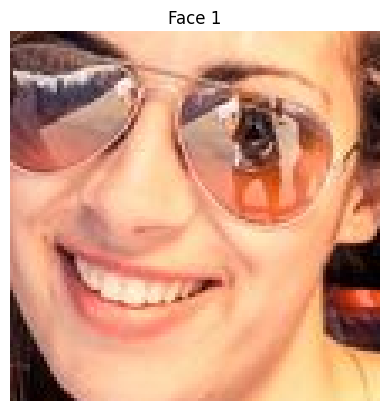

Saved output_faces/face_1.jpg


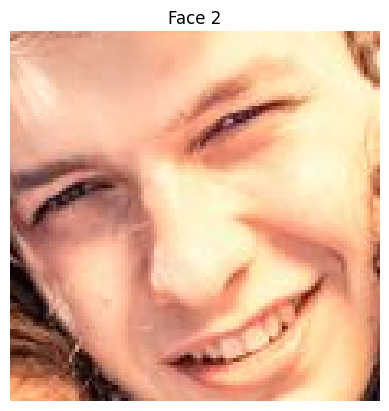

Saved output_faces/face_2.jpg


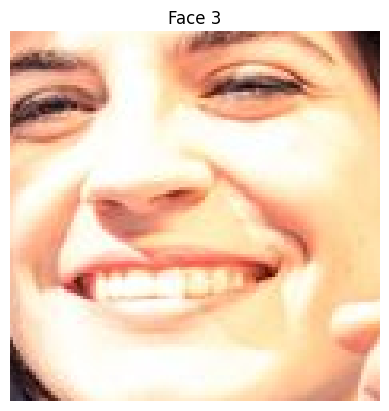

Saved output_faces/face_3.jpg


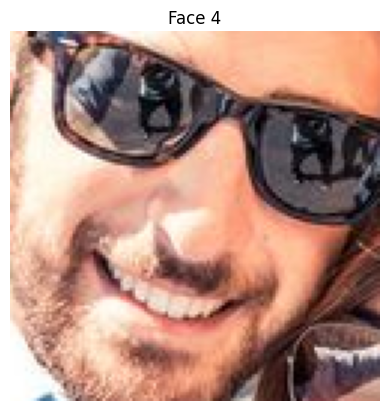

Saved output_faces/face_4.jpg


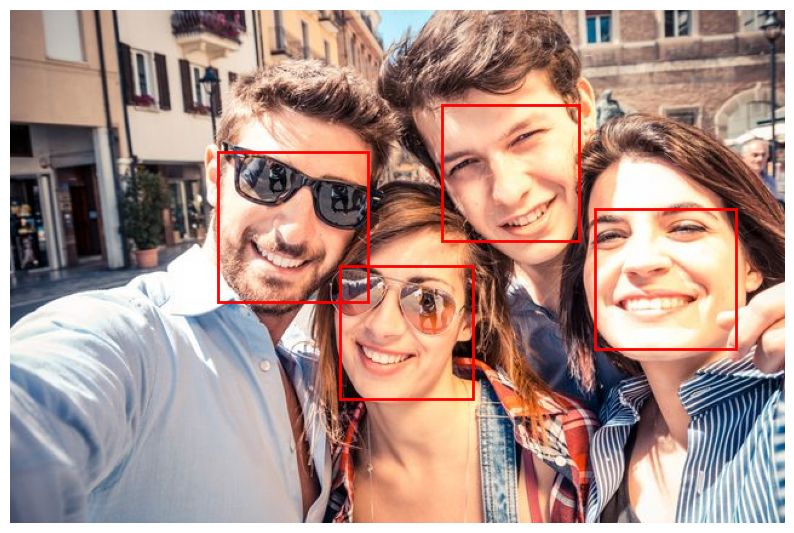

In [7]:
# Check if the image is loaded correctly
if image is None:
    print(f"Error loading image: {image_path}")
else:
    # Convert the image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Use Mediapipe to detect faces
    with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5) as face_detection:
        results = face_detection.process(image_rgb)

        # Extract and save each detected face
        if results.detections:
            for idx, detection in enumerate(results.detections):
                bboxC = detection.location_data.relative_bounding_box
                ih, iw, _ = image.shape
                x_min = int(bboxC.xmin * iw)
                y_min = int(bboxC.ymin * ih)
                width = int(bboxC.width * iw)
                height = int(bboxC.height * ih)

                # Crop the face from the image
                face = image[y_min:y_min + height, x_min:x_min + width]

                # Save the face image
                face_filename = os.path.join(output_dir, f'face_{idx + 1}.jpg')
                cv2.imwrite(face_filename, face)

                # Optionally display the cropped face
                plt.figure()
                plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
                plt.title(f'Face {idx + 1}')
                plt.axis('off')
                plt.show()

                print(f'Saved {face_filename}')

    # Optionally display the original image with detected faces
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    for detection in results.detections:
        bboxC = detection.location_data.relative_bounding_box
        ih, iw, _ = image.shape
        x_min = int(bboxC.xmin * iw)
        y_min = int(bboxC.ymin * ih)
        width = int(bboxC.width * iw)
        height = int(bboxC.height * ih)
        rect = Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
    plt.axis('off')
    plt.show()

## Facial Beauty Rate Model

### Overview

The SCUT-FBP5500 dataset has totally 5500 frontal faces with diverse properties (male/female, Asian/Caucasian, ages) and diverse labels (facial landmarks, beauty scores in 5 scales, beauty score distribution)¶
$\newline$
This allows different computational model with different facial beauty prediction paradigms, such as appearance-based/shape-based facial beauty classification/regression/ranking model for male/female of Asian/Caucasian.
$\newline$
This part uses the following research paper as a reference for implementing and training the model: [Facial Beauty Prediction Using Deep Learning](https://www.sciencedirect.com/science/article/pii/S0950705122000740).
Also, I mostly employ the following kaggle project to build this model : [Facial_Attractiveness](https://www.kaggle.com/code/tejasrao01/facial-attractiveness)

## The final program

### Import Libraries

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import mediapipe as mp
import torchvision
from torchvision.models import ResNeXt50_32X4D_Weights, Inception_V3_Weights

* **`empty_folder(folder)`**:
   This function is designed to clear out all the contents of a specified directory to avoid overlap if you want to place different images in it. It takes a single argument, `folder`, which is the path to the directory to be emptied. 

In [9]:
def empty_folder(folder):
    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print(f'Error deleting {file_path}. Reason: {e}')

* **`class Model(nn.Module)`**:
   This class defines a custom neural network model that combines the outputs of two pre-trained models, ResNeXt50 and Inception V3 (from [Facial_Attractiveness](https://www.kaggle.com/code/tejasrao01/facial-attractiveness)). 

In [10]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.model1 = torchvision.models.resnext50_32x4d(weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1)
        self.model1.fc = nn.Linear(2048, 1024)

        self.model2 = torchvision.models.inception_v3(weights=Inception_V3_Weights.IMAGENET1K_V1)
        self.model2.fc = nn.Linear(2048, 1024)
        self.fc2 = nn.Linear(2048, 1)

    def forward(self, input1, input2):
        c = self.model1(input1)
        f = self.model2(input2)
        if self.training:
            l, ll = f
        else:
            l = f
        combined = torch.cat((c, l), dim=1)

        out = self.fc2(F.relu(combined))
        return out

* **`load_image(file_path)`**:
   This function is responsible for loading and preprocessing an image for input into the model.

In [11]:
def load_image(file_path):
    image = Image.open(file_path)
    image1 = image.resize((256, 256))  # Resize to match the model input size
    image1 = np.transpose(np.array(image1) / 255.0, (2, 0, 1))  # Normalize pixel values
    image2 = image.resize((299, 299))  # Resize to match the model input size
    image2 = np.transpose(np.array(image2) / 255.0, (2, 0, 1))  # Normalize pixel values
    return image1, image2, image  # Also return the original image for visualization

* **`detect_faces(image_rgb)`**:
   This function uses Mediapipe's face detection capabilities to detect faces in an RGB image. 

In [12]:
def detect_faces(image_rgb):
    mp_face_detection = mp.solutions.face_detection
    with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5) as face_detection:
        results = face_detection.process(image_rgb)
    return results

* **`extract_faces(image, results)`**:
   This function extracts the faces from the original image based on the detection results obtained from Mediapipe. 
  

In [13]:
def extract_faces(image, results):
    face_images = []
    if results.detections:
        for detection in results.detections:
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, _ = image.shape
            x_min = int(bboxC.xmin * iw)
            y_min = int(bboxC.ymin * ih)
            width = int(bboxC.width * iw)
            height = int(bboxC.height * ih)
            face = image[y_min:y_min + height, x_min:x_min + width]
            face_images.append(face)
    return face_images

* **`save_faces(face_images, output_dir)`**:
   This function saves the extracted faces to the specified output directory and optionally displays them. 

In [14]:
def save_faces(face_images, output_dir):
    for idx, face in enumerate(face_images):
        face_filename = os.path.join(output_dir, f'face_{idx + 1}.jpg')
        cv2.imwrite(face_filename, face)
        plt.figure()
        plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
        plt.title(f'Face {idx + 1}')
        plt.axis('off')
        plt.show()
        print(f'Saved {face_filename}')

* **`prepare_images(output_dir)`**:
   This function prepares the images in the specified directory for input into the model. 

In [15]:
def prepare_images(output_dir):
    image_files = [os.path.join(output_dir, f) for f in os.listdir(output_dir) if f.endswith('.jpg') or f.endswith('.png')]
    num_images = len(image_files)
    images1 = np.zeros((num_images, 3, 256, 256))
    images2 = np.zeros((num_images, 3, 299, 299))
    original_images = []
    for i, file_path in enumerate(image_files):
        image1, image2, original_image = load_image(file_path)
        images1[i, :, :, :] = image1
        images2[i, :, :, :] = image2
        original_images.append(original_image)
    return images1, images2, original_images

* **`load_model_weights(model, model_weights_path)`**:
   This function loads the pre-trained weights into the model. 

In [16]:
def load_model_weights(model, model_weights_path):
    model_weights = torch.load(model_weights_path, map_location=torch.device('cpu'))
    model.load_state_dict(model_weights)
    return model

* **`visualize_results(num_images, original_images, output)`**:
   This function visualizes the results of the model's predictions. 

In [17]:
def visualize_results(num_images, original_images, output):
    for count in range(num_images):
        plt.imshow(original_images[count])
        plt.title('Image {}\nScore: {:.2f}'.format(count + 1, output[count][0]))
        plt.axis('off')
        plt.tight_layout()
        plt.show()

* **`main(image_path, output_dir, model_weights_path)`**:
    This is the main function that orchestrates the entire process. 

W0000 00:00:1721994183.883528      89 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/opt/conda/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


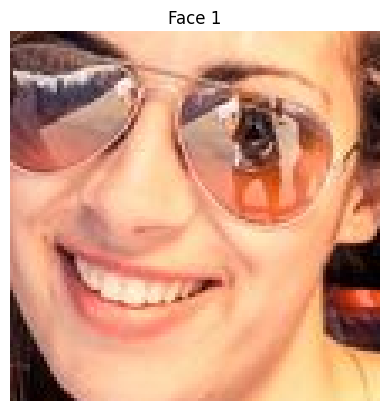

Saved /kaggle/working/output_faces/face_1.jpg


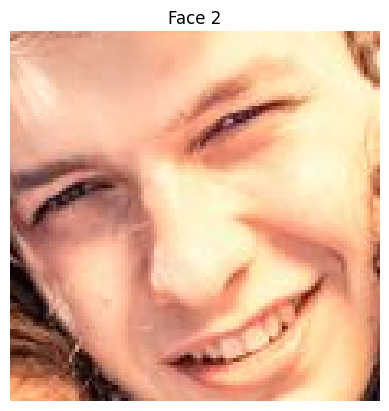

Saved /kaggle/working/output_faces/face_2.jpg


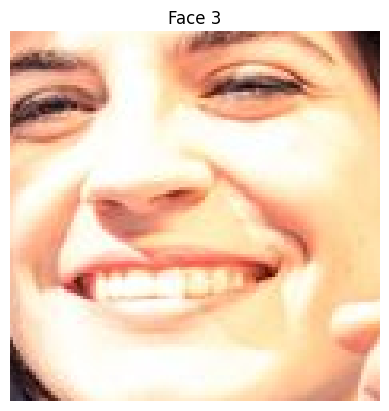

Saved /kaggle/working/output_faces/face_3.jpg


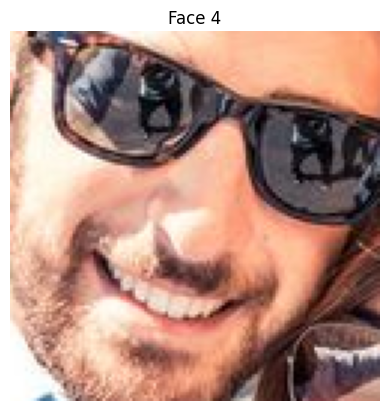

Saved /kaggle/working/output_faces/face_4.jpg


Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:00<00:00, 130MB/s]
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 143MB/s] 


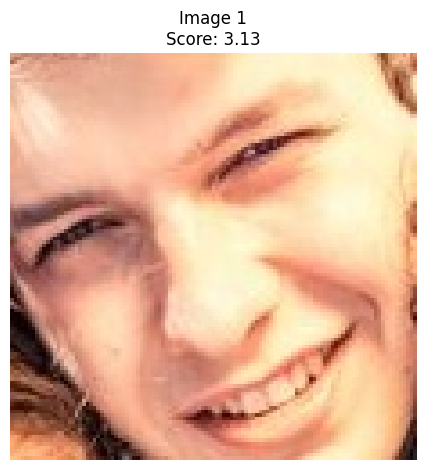

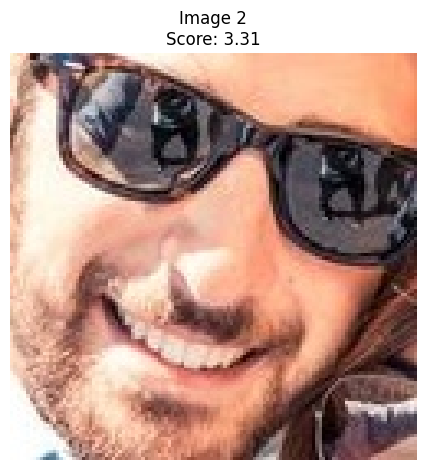

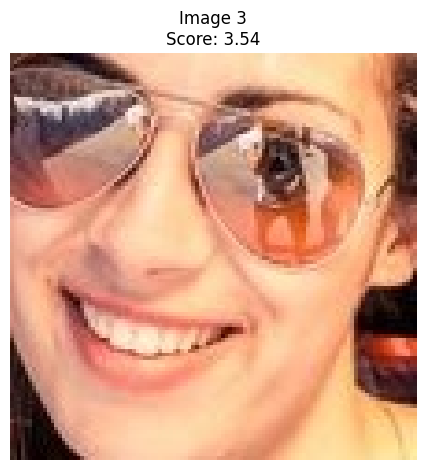

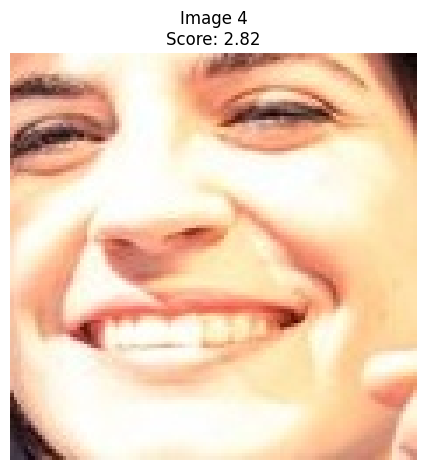

In [18]:
def main(image_path, output_dir, model_weights_path):
    # Initialize and empty the output folder
    os.makedirs(output_dir, exist_ok=True)
    empty_folder(output_dir)

    # Load the image from disk
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        return

    # Convert the image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect faces
    results = detect_faces(image_rgb)

    # Extract faces
    face_images = extract_faces(image, results)

    # Save faces
    save_faces(face_images, output_dir)

    # Load the model
    model = Model()
    model = load_model_weights(model, model_weights_path)

    # Use the specific device (e.g., CPU)
    device = torch.device('cpu')
    model.to(device)

    # Prepare images
    images1, images2, original_images = prepare_images(output_dir)
    images1 = torch.tensor(images1).float().to(device)
    images2 = torch.tensor(images2).float().to(device)

    # Pass the images through the model
    output = model(images1, images2)
    output = output.detach().cpu().numpy()

    # Visualize the results
    visualize_results(len(original_images), original_images, output)

# Call the main function
image_path = '/kaggle/input/image-test/3261_test-1670861746.jpg'  # Replace with your image path
output_dir = '/kaggle/working/output_faces'  # Directory to save extracted faces
model_weights_path = '/kaggle/input/beauty-rate-model/model_weights.pth'  # Path to the model weights

main(image_path, output_dir, model_weights_path)
